# Titanic Proyect

* Acces to the data

In [356]:
import numpy as np # linear algebra                                                                                                           
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)                                                                        
import matplotlib.pyplot as plt # this is used for the plot the graph                                                                         
import seaborn as sns # used for plot interactive graph.                                                                                      
#import pandas_profiling
from pandas_profiling import ProfileReport

%matplotlib inline  

In [355]:
df = pd.read_csv("train.csv", sep=",")

## Descriptive analysis

In [320]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [321]:
df.shape

(891, 12)

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [323]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [324]:
ProfileReport(df)


Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.6 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


<Figure size 800x550 with 0 Axes>

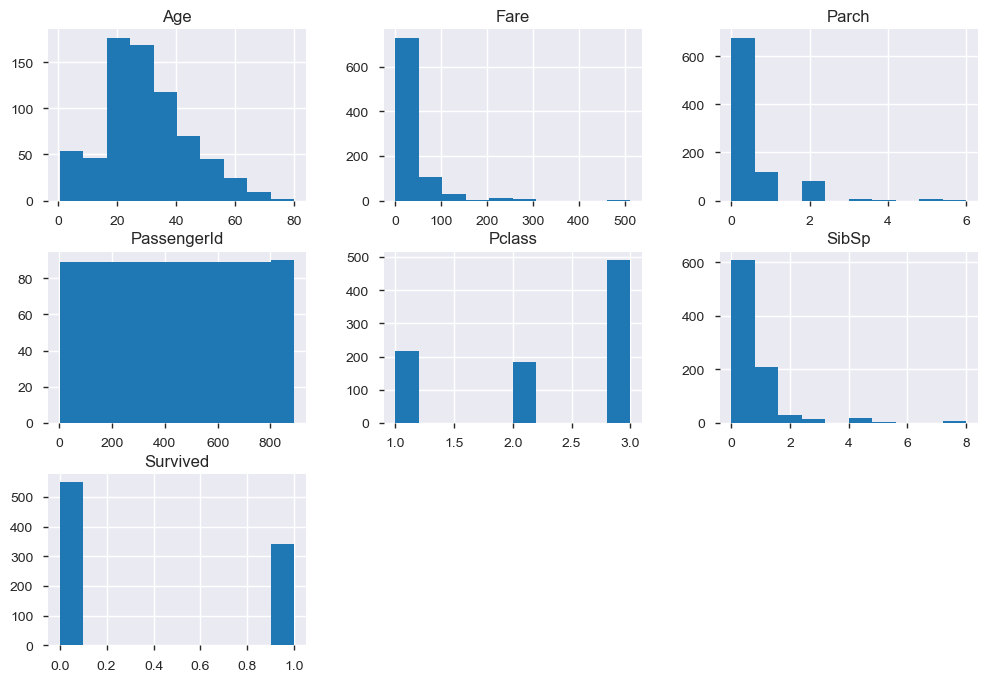

<Figure size 800x550 with 0 Axes>

In [325]:
df.hist(figsize=(12,8))
plt.figure()

## Analysis Descriptive

* Surviving rate

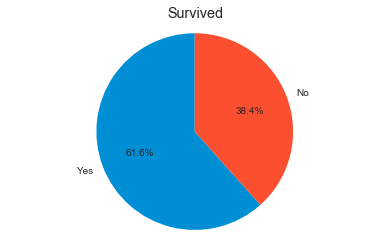

In [349]:
col = "Survived"
grouped = df[col].value_counts().reset_index() # def[col] takes the columns Survived, value_counts() 
    #counts the no of each value
    #grouped is a matrix: rows: 0,1. Three Columns: 0 or 1, index and survived.
grouped = grouped.rename(columns = {col : "count", "index" : col}) # (col = Survived) so rename columns: Survived to 
#count, and index to Survived 

# The elements can be accessed as a matrix: list["column"][raw].
# So, the number of persons who did not survived is grouped['count'][0]

labels = 'Yes', 'No'
sizes = grouped['count']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Survived")
plt.show()

* Sex 

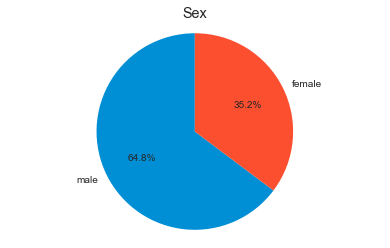

In [350]:
col = "Sex"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col}) 

labels = 'male', 'female'
sizes = grouped['count']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Sex")
plt.show()

* Surviving rate female vs male

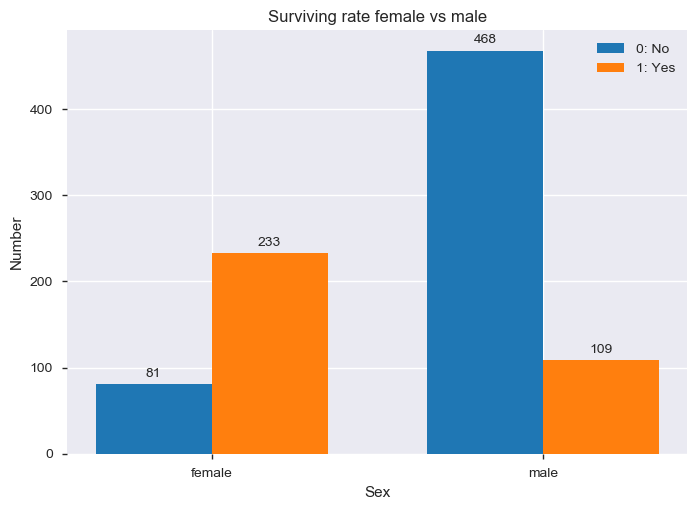

In [328]:
x=df
d1=x[x['Survived']==0] # Selected data of persons who did not survived
d2=x[x['Survived']==1] # Selected data of persons who did survived

col='Sex'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count'])) 
# An additional column is included into the data
# "percent" and it is filled by the calculation inside apply function
v1=v1.sort_values(col)

v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

labels = 'female', 'male'
sizes1 = v1['count']
sizes2 = v2['count']
xl = np.arange(len(labels))  # the label locations (its an arrange=[0,1])
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(xl - width/2, sizes1, width, label='0: No')
rects2 = ax.bar(xl + width/2, sizes2, width, label='1: Yes')

ax.set_ylabel('Number')
ax.set_xlabel('Sex')
ax.set_title('Surviving rate female vs male')
ax.set_xticks(xl)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

* Surviving rate in Pclass (1 = upper class, 2 = middle class, and 3 = lower class)

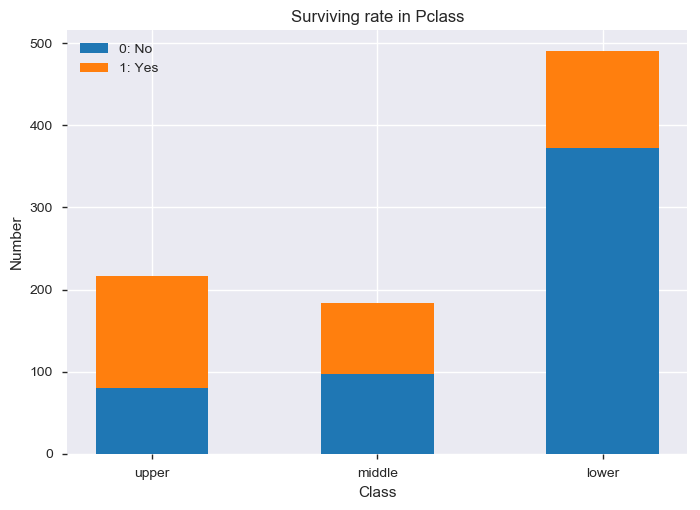

In [329]:
col='Pclass'
#v1 -> Not survived
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count'])) 
v1=v1.sort_values(col)
#v2 -> Survived
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

labels = 'upper', 'middle', 'lower'
xl = np.arange(len(labels))  # the label locations (its an arrange=[0,1])
width = 0.5  # the width of the bars
sizes1 = v1['count']
sizes2 = v2['count']

fig, ax = plt.subplots()
rects1 = ax.bar(xl, sizes1, width, label='0: No')
rects2 = ax.bar(xl, sizes2, width, bottom=sizes1, label='1: Yes')

ax.set_ylabel('Number')
ax.set_xlabel('Class')
ax.set_title('Surviving rate in Pclass')
ax.set_xticks(xl)
ax.set_xticklabels(labels)

ax.legend()

#autolabel(rects1+autolabel(rects2))

#ax.annotate('{}'.format(height), xy=(rects2.get_x() + rects2.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()


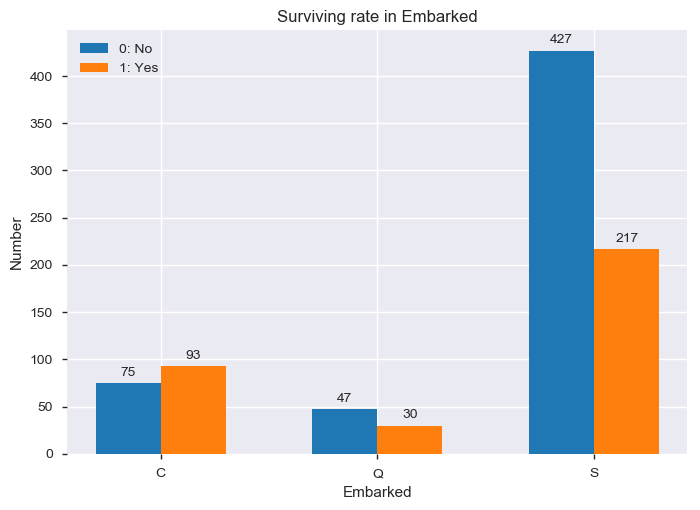

In [330]:
#embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
col='Embarked'
v1=d1[col].value_counts().reset_index() #v2 -> NOT Survived
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count'])) 
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index() #v2 -> Survived
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

labels = 'C', 'Q', 'S'
xl = np.arange(len(labels))  # the label locations (its an arrange=[0,1])
width = 0.3  # the width of the bars
sizes1 = v1['count']
sizes2 = v2['count']
fig, ax = plt.subplots()

rects1 = ax.bar(xl - width/2, sizes1, width, label='0: No')
rects2 = ax.bar(xl + width/2, sizes2, width, label='1: Yes')

ax.set_ylabel('Number')
ax.set_xlabel('Embarked')
ax.set_title('Surviving rate in Embarked')
ax.set_xticks(xl)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

plt.show()

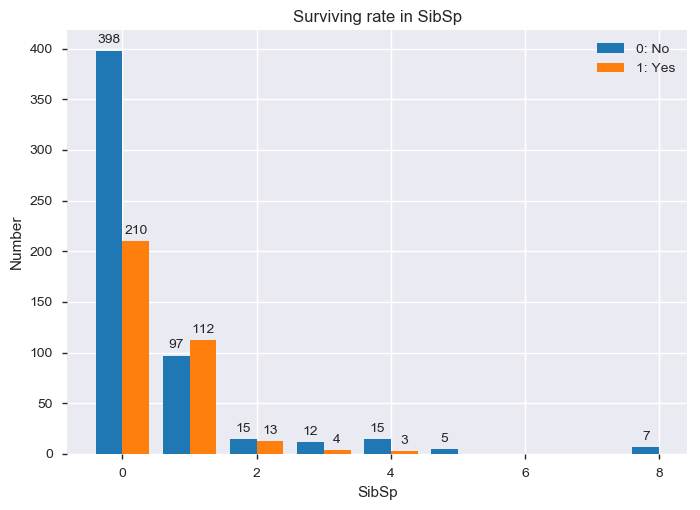

In [331]:

# Number of siblings and spouses onboard. Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés were ignored)
col='SibSp'
v1=d1[col].value_counts().reset_index() #v2 -> NOT Survived
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count'])) 
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index() #v2 -> Survived
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

width = 0.4  # the width of the bars
xl = v1[col]
xl2 = v2[col]
sizes1 = v1['count']
sizes2 = v2['count']
fig, ax = plt.subplots()

rects1 = ax.bar(xl - width/2, sizes1, width, label='0: No')
rects2 = ax.bar(xl2 + width/2, sizes2, width, label='1: Yes')

ax.set_ylabel('Number')
ax.set_xlabel('SibSp')
ax.set_title('Surviving rate in SibSp')
ax.legend()

autolabel(rects1)
autolabel(rects2)

plt.show()

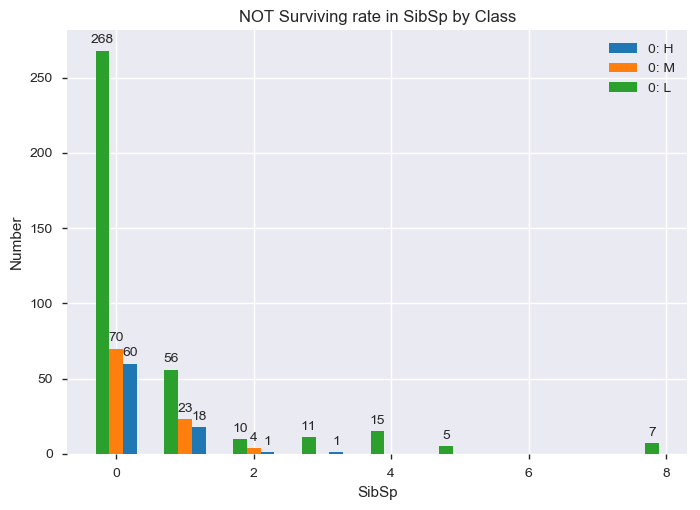

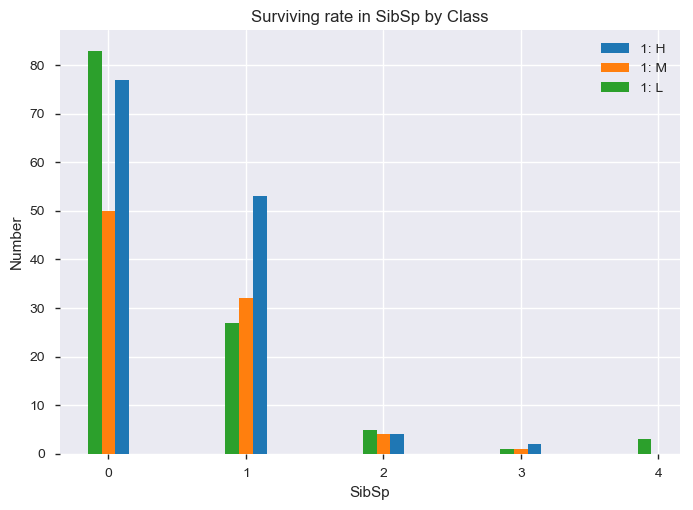

In [332]:
x=df
d1=x[x['Survived']==0] # Selected data of persons who did not survived
d2=x[x['Survived']==1] # Selected data of persons who did survived

pch1=d1[d1['Pclass'] == 1] # Selected data of high class persons who did not survived
pcm1=d1[d1['Pclass'] == 2] # Selected data of middle class persons who did not survived
pcl1=d1[d1['Pclass'] == 3] # Selected data of low class persons who did not survived

pch2=d2[d2['Pclass'] == 1] # Selected data of high class persons who did not survived
pcm2=d2[d2['Pclass'] == 2] # Selected data of middle class persons who did not survived
pcl2=d2[d2['Pclass'] == 3] # Selected data of low class persons who did not survived

col='SibSp'
v1=pch1[col].value_counts().reset_index() #v1 -> high class NOT Survived
v1=v1.rename(columns={col:'count','index':col})
v1=v1.sort_values(col)
v2=pcm1[col].value_counts().reset_index() #v2 -> middle class NOT Survived
v2=v2.rename(columns={col:'count','index':col})
v2=v2.sort_values(col)
v3=pcl1[col].value_counts().reset_index() #v2 -> low class NOT Survived
v3=v3.rename(columns={col:'count','index':col})
v3=v3.sort_values(col)
v4=pch2[col].value_counts().reset_index() #v1 -> high class Survived
v4=v4.rename(columns={col:'count','index':col})
v4=v4.sort_values(col)
v5=pcm2[col].value_counts().reset_index() #v2 -> middle class Survived
v5=v5.rename(columns={col:'count','index':col})
v5=v5.sort_values(col)
v6=pcl2[col].value_counts().reset_index() #v2 -> low class Survived
v6=v6.rename(columns={col:'count','index':col})
v6=v6.sort_values(col)


width = 0.2  # the width of the bars
xl = v1[col]
xl2 = v2[col]
xl3 = v3[col]
xl4 = v4[col]
xl5 = v5[col]
xl6 = v6[col]

sizes1 = v1['count']
sizes2 = v2['count']
sizes3 = v3['count']
sizes4 = v4['count']
sizes5 = v5['count']
sizes6 = v6['count']

fig, ax = plt.subplots()
rects1 = ax.bar(xl+width, sizes1, width, label='0: H')
rects2 = ax.bar(xl2 , sizes2, width, label='0: M')
rects3 = ax.bar(xl3-width , sizes3, width, label='0: L')

ax.set_ylabel('Number')
ax.set_xlabel('SibSp')
ax.set_title('NOT Surviving rate in SibSp by Class')
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()
width = 0.1  # the width of the bars

fig, ax1 = plt.subplots()
rects4 = ax1.bar(xl4+width, sizes4, width, label='1: H')
rects5 = ax1.bar(xl5 , sizes5, width, label='1: M')
rects6 = ax1.bar(xl6-width , sizes6, width, label='1: L')

ax1.set_ylabel('Number')
ax1.set_xlabel('SibSp')
ax1.set_title('Surviving rate in SibSp by Class')
ax1.legend()

autolabel(rects4)
autolabel(rects5)
autolabel(rects6)

plt.show()

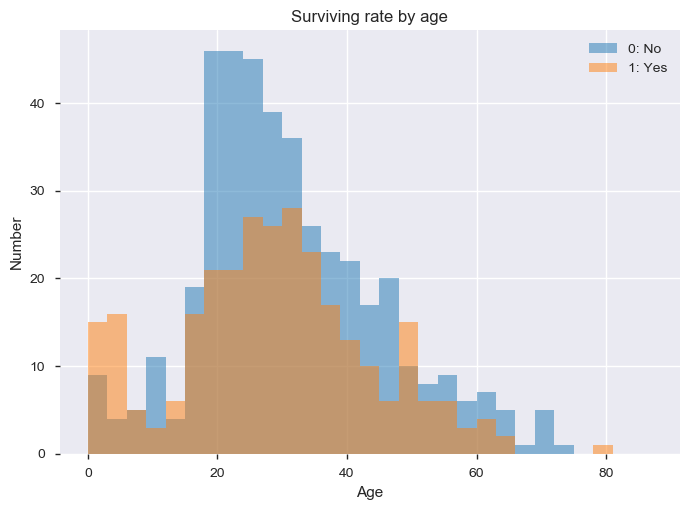

In [333]:
# Age
x=df
d1=x[x['Survived']==0] # Selected data of persons who did not survived
d2=x[x['Survived']==1] # Selected data of persons who did survived


col='Age'
v1=d1[col]
v2=d2[col]
fig, ax = plt.subplots()

n = 3
bins = [z*n for z in range(0,int(90/n))]

rects1 = ax.hist(v1, bins=bins, histtype='stepfilled', alpha=0.5, stacked=False, label='0: No')
rects2 = ax.hist(v2, bins=bins, histtype='stepfilled', alpha=0.5, stacked=True, label='1: Yes')

ax.set_ylabel('Number')
ax.set_xlabel('Age')
ax.set_title('Surviving rate by age')
ax.legend()

plt.show()

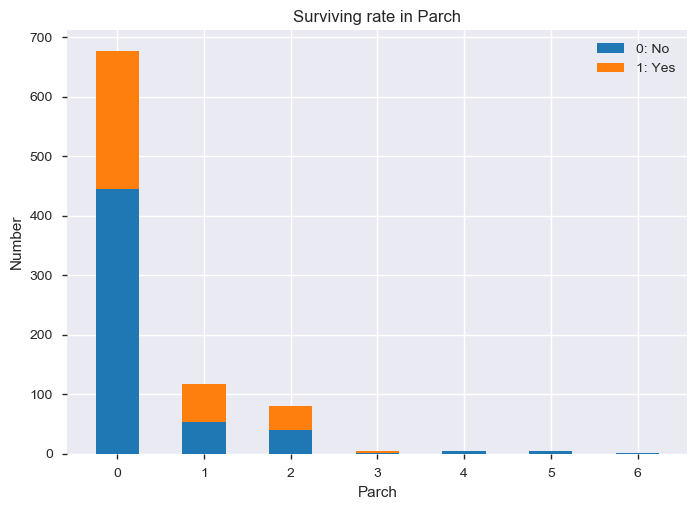

In [334]:
# parch -> of parents / children aboard the Titanic
x=df
d1 = x[x["Survived"]==0]
d2 = x[x["Survived"]==1]

col = "Parch"
v1 = d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count'])) 
v1=v1.sort_values(col)
v2 = d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count'])) 
v2=v2.sort_values(col)

width = 0.5
xl = v1[col]
xl2 = v2[col]
#sizes1 = v1["count"]
#sizes2 = v2["count"]

fig, ax = plt.subplots()

zmax = [xl.max(),xl2.max()]
y=[]
sizes1 = []
sizes2 = []

for i in range(0,max(zmax)+1):
    y.append(i) 

for i in y:
    if i not in xl:
        sizes1.append(0)
    if i not in xl2:
        sizes2.append(0)
    for j in range(len(xl)):
        if i == xl[j]:
            sizes1.append(v1["count"][j])
    for j in range(len(xl2)):
        if i == xl2[j]:
            sizes2.append(v2["count"][j])
    
rects1 = ax.bar(y, sizes1, width, label="0: No") 
rects2 = ax.bar(y, sizes2, width, bottom=sizes1, label="1: Yes") 

ax.set_ylabel('Number')
ax.set_xlabel(col)
ax.set_title('Surviving rate in Parch')
ax.legend()

plt.show()

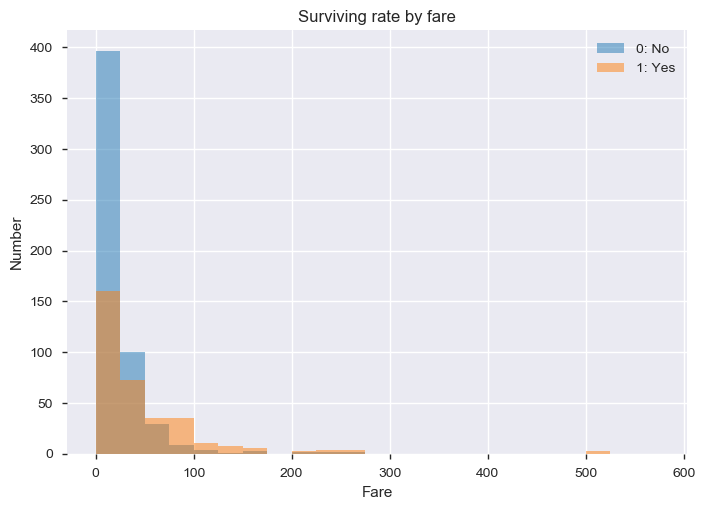

In [335]:
# Passenger fare
x=df
d1=x[x['Survived']==0] # Selected data of persons who did not survived
d2=x[x['Survived']==1] # Selected data of persons who did survived

col='Fare'
v1=d1[col]
v2=d2[col]
fig, ax = plt.subplots()

n = 25
bins = [z*n for z in range(0,int(600/n))]

rects1 = ax.hist(v1, bins=bins, histtype='stepfilled', alpha=0.5, stacked=False, label='0: No')
rects2 = ax.hist(v2, bins=bins, histtype='stepfilled', alpha=0.5, stacked=True, label='1: Yes')

ax.set_ylabel('Number')
ax.set_xlabel('Fare')
ax.set_title('Surviving rate by fare')
ax.legend()

plt.show()

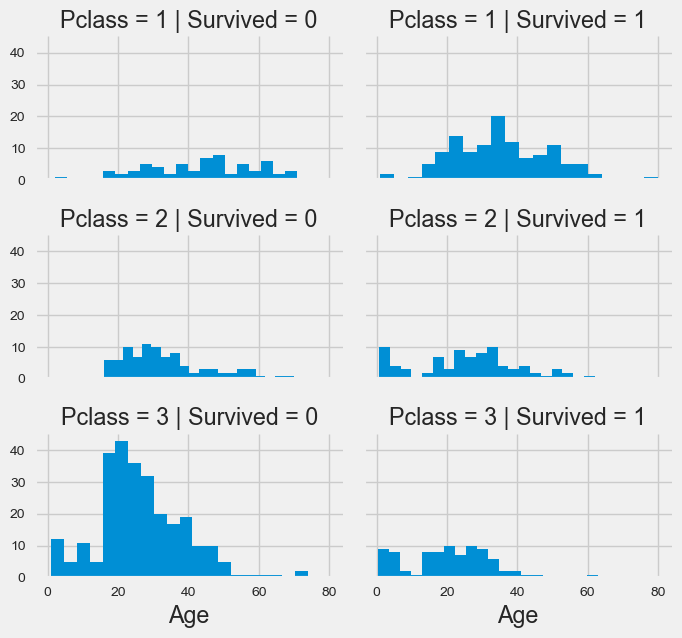

In [336]:
plt.style.use('fivethirtyeight')
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)

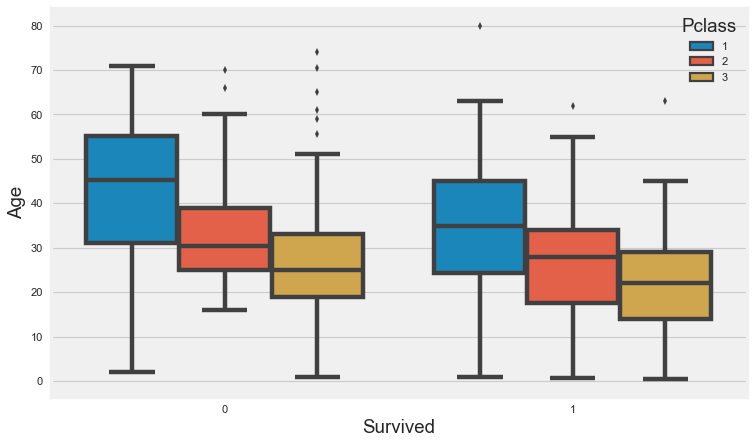

In [337]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.boxplot(y='Age', x='Survived', hue="Pclass", data=df)
plt.show()

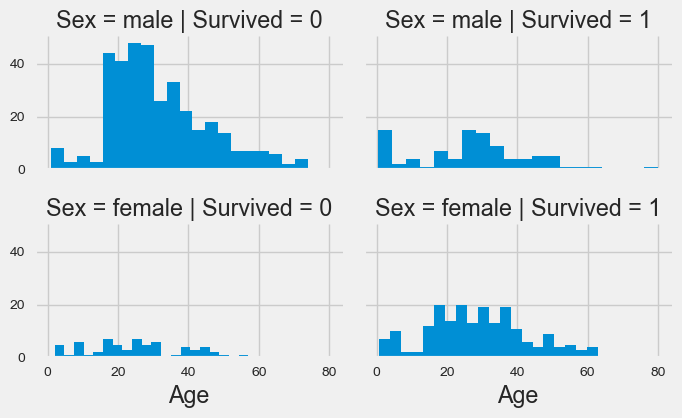

In [338]:
plt.style.use('fivethirtyeight')
grid = sns.FacetGrid(df, col='Survived', row='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)

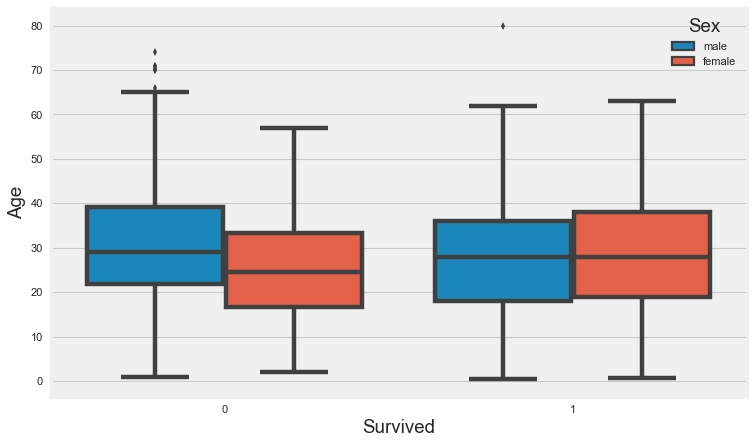

In [339]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.boxplot(y='Age', x='Survived', hue="Sex", data=df)
plt.show()

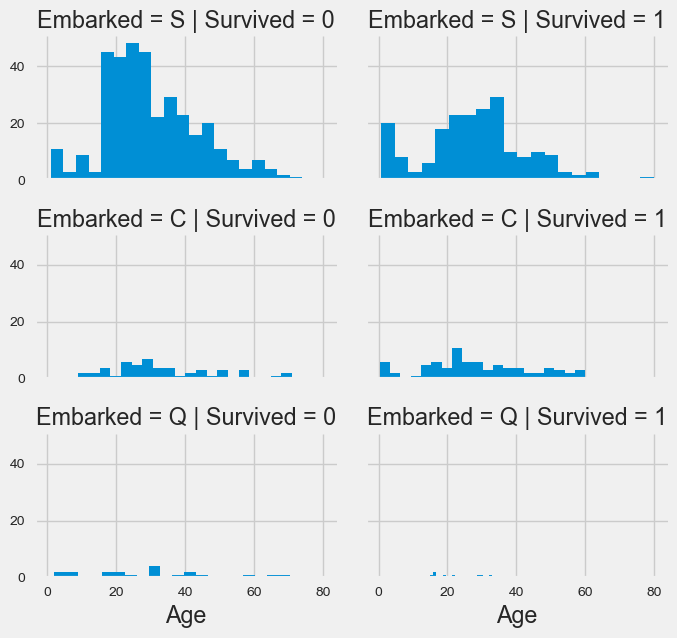

In [340]:
plt.style.use('fivethirtyeight')
grid = sns.FacetGrid(df, col='Survived', row='Embarked', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)

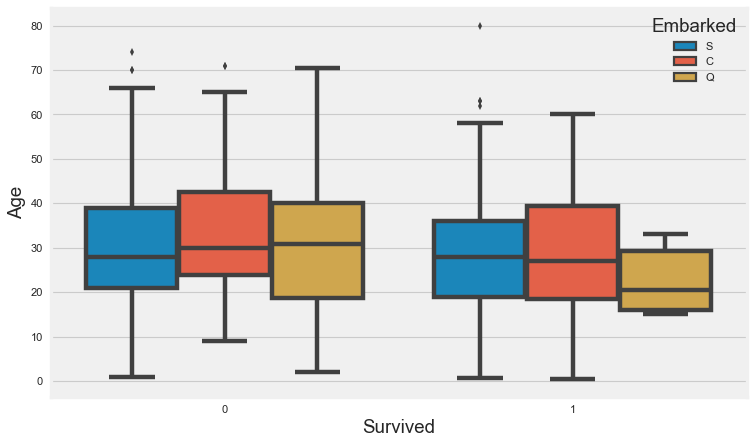

In [341]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
sns.boxplot(y='Age', x='Survived', hue="Embarked", data=df)
plt.show()

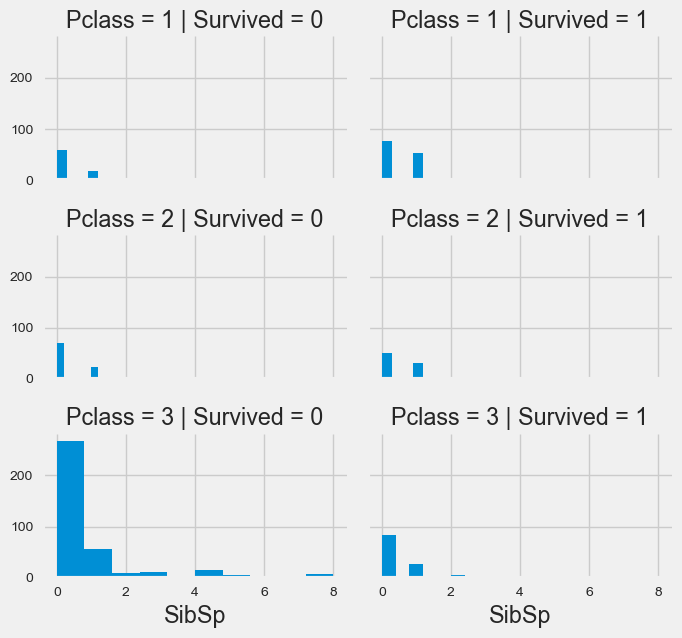

In [342]:
plt.style.use('fivethirtyeight')
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'SibSp', bins=10)

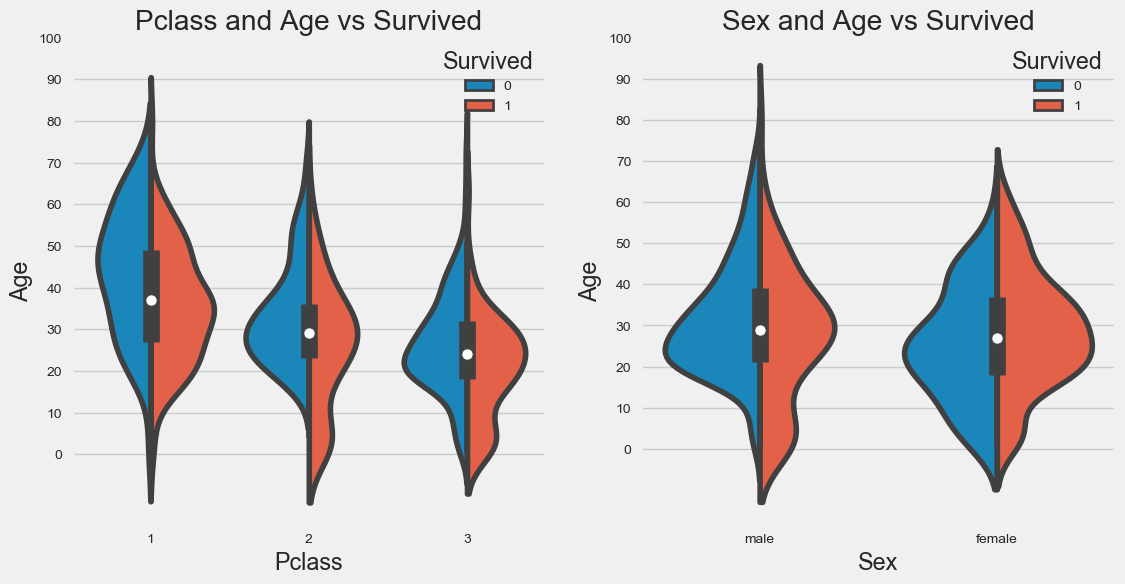

In [343]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.violinplot("Pclass","Age", hue="Survived", data=df,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

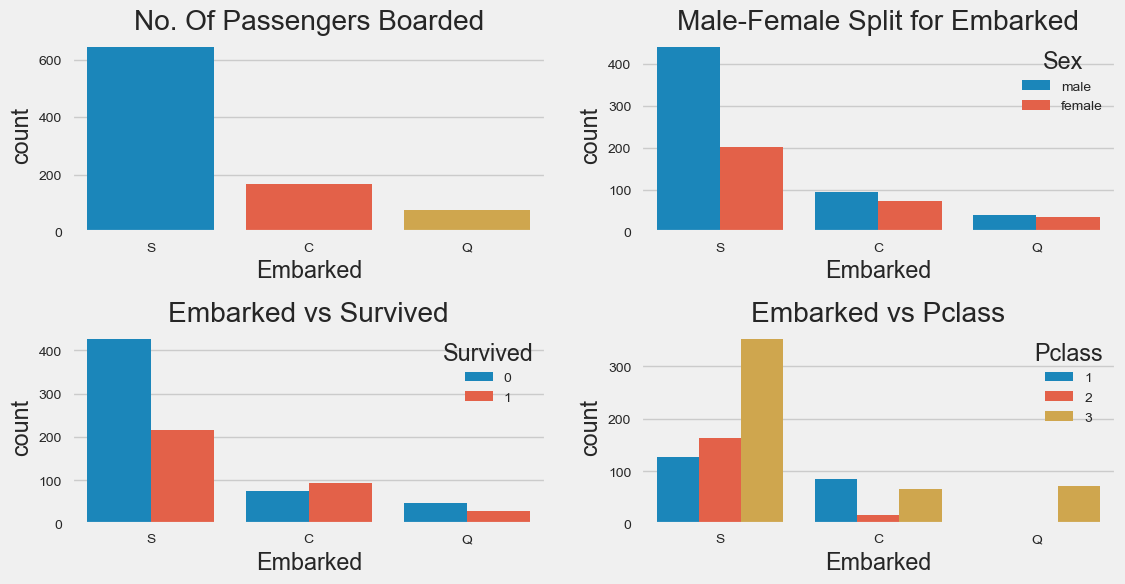

In [344]:
f,ax=plt.subplots(2,2,figsize=(12,6))
sns.countplot('Embarked',data=df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

## Correlations

In [345]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


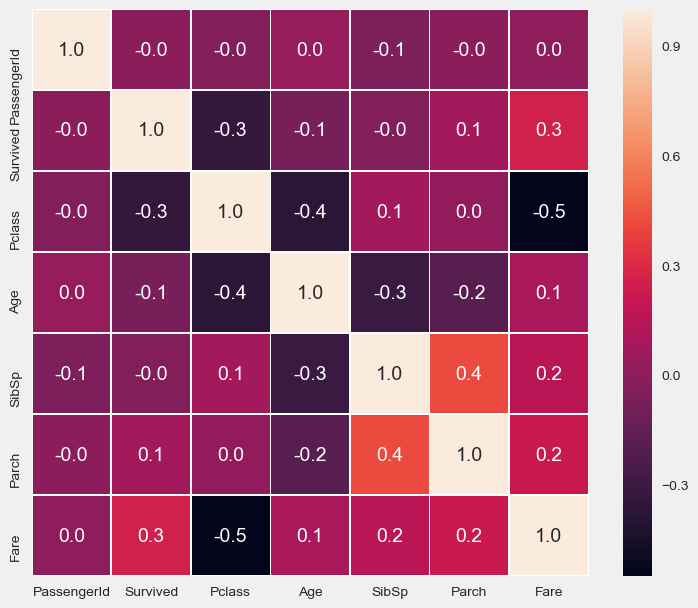

In [346]:

fig,ax = plt.subplots(figsize=(8,7))
ax = sns.heatmap(df.corr(), annot=True,linewidths=.5,fmt='.1f')
plt.show()
